<a href="https://colab.research.google.com/github/ricardorocha86/Python-para-Machine-Learning/blob/master/Python_para_ML_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![texto alternativo](https://raw.githubusercontent.com/ricardorocha86/Python-para-Machine-Learning/master/Imagens/capa%20-%20python%20para%20ml%2007.jpg)


# **Python para Machine Learning** - Parte 7

Nesse notebook vamos ver:
- Análise gráfica
- Introdução ao pré-processamento para Machine Learning
- A Biblioteca Scikit-learn
- Projeto
- Exercício
- Links Úteis

## Importação dos Dados

In [ ]:
import pandas as pd

In [ ]:
url = 'https://raw.githubusercontent.com/ricardorocha86/Dados-Redes-Sociais/master/Social_Network_Ads.csv'
ads = pd.read_csv(url)

In [ ]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


## Análise Exploratória dos Dados

In [ ]:
ads.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

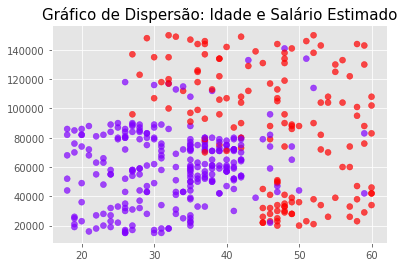

In [ ]:
plt.scatter(x = ads['Age'], 
            y = ads['EstimatedSalary'], 
            c = ads['Purchased'],
            marker = 'o', alpha = 0.7, cmap = 'rainbow')
plt.title('Gráfico de Dispersão: Idade e Salário Estimado', size = 15)
plt.show()

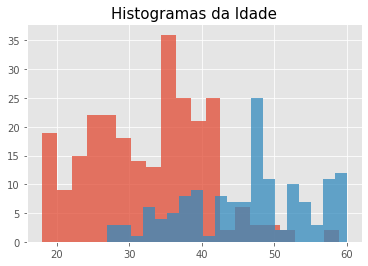

In [ ]:
plt.hist(ads[ ads['Purchased'] == 0 ]['Age'], bins = 20, alpha = .75)
plt.hist(ads[ ads['Purchased'] == 1 ]['Age'], bins = 20, alpha = .75) 
plt.title('Histogramas da Idade', size = 15) 
plt.show()

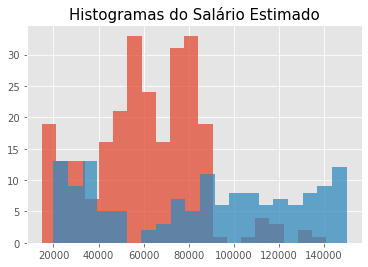

In [ ]:
plt.hist(ads[ ads['Purchased'] == 0 ]['EstimatedSalary'], bins = 20, alpha = .75)
plt.hist(ads[ ads['Purchased'] == 1 ]['EstimatedSalary'], bins = 20, alpha = .75) 
plt.title('Histogramas do Salário Estimado', size = 15) 
plt.show()

In [ ]:
ads['Gender'].groupby(ads['Purchased']).value_counts()

Purchased  Gender
0          Male      130
           Female    127
1          Female     77
           Male       66
Name: Gender, dtype: int64

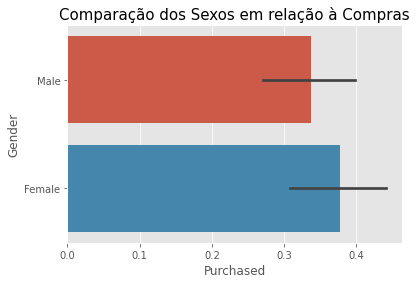

In [ ]:
import seaborn as sns

sns.barplot(x='Purchased', y = 'Gender', data = ads)
plt.title('Comparação dos Sexos em relação à Compras', size = 15)
plt.show()

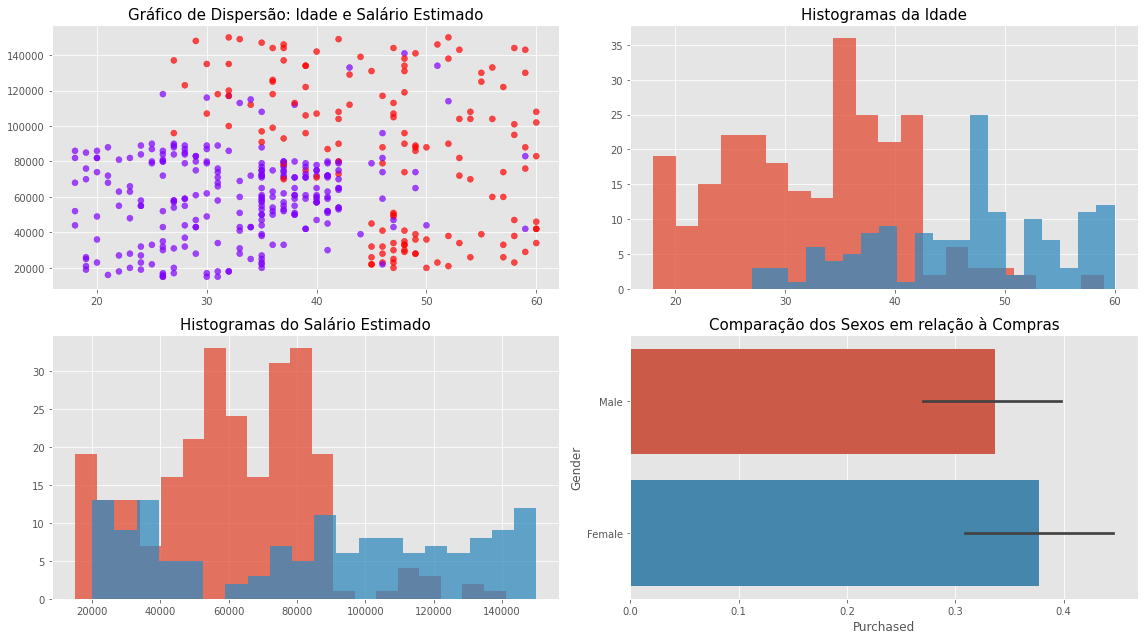

In [ ]:
plt.figure(figsize = (16, 9))

plt.subplot(2, 2, 1)
plt.scatter(x = ads['Age'], y = ads['EstimatedSalary'], c = ads['Purchased'],
            marker = 'o', alpha = 0.7, cmap = 'rainbow')
plt.title('Gráfico de Dispersão: Idade e Salário Estimado', size = 15) 

plt.subplot(2, 2, 2)
plt.hist(ads[ ads['Purchased'] == 0 ]['Age'], bins = 20, alpha = .75)
plt.hist(ads[ ads['Purchased'] == 1 ]['Age'], bins = 20, alpha = .75) 
plt.title('Histogramas da Idade', size = 15) 

plt.subplot(2, 2, 3)
plt.hist(ads[ ads['Purchased'] == 0 ]['EstimatedSalary'], bins = 20, alpha = .75)
plt.hist(ads[ ads['Purchased'] == 1 ]['EstimatedSalary'], bins = 20, alpha = .75) 
plt.title('Histogramas do Salário Estimado', size = 15) 

plt.subplot(2, 2, 4)
sns.barplot(x='Purchased', y = 'Gender', data = ads)
plt.title('Comparação dos Sexos em relação à Compras', size = 15)

plt.tight_layout()  

plt.show()

## Pré-processamento Básico

In [ ]:
ads['Sexo'] = 1
ads.loc[ads['Gender'] == 'Female', 'Sexo'] = 0 

In [ ]:
med_age = ads['Age'].mean()
std_age = ads['Age'].std()

med_es = ads['EstimatedSalary'].mean()
std_es = ads['EstimatedSalary'].std()

print(med_age, std_age, med_es, std_es)

37.655 10.48287659730792 69742.5 34096.960282424785


In [ ]:
ads['Idade'] = (ads['Age'] - med_age)/std_age
ads['Salario'] = (ads['EstimatedSalary'] - med_es)/std_es

In [ ]:
ads.describe()

,User ID,Age,EstimatedSalary,Purchased,Sexo,Idade,Salario
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,4.000000e+02,4.000000e+02
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.490000,-2.486900e-16,-1.554312e-17
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,1.000000e+00,1.000000e+00
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,-1.874962e+00,-1.605495e+00
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,-7.540869e-01,-7.843075e-01
50%,1.569434e+07,37.000000,70000.000000,0.000000,0.000000,-6.248285e-02,7.551993e-03
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,7.960601e-01,5.354583e-01
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,2.131571e+00,2.353802e+00


In [ ]:
ads.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Sexo,Idade,Salario
0,15624510,Male,19.0,19000.0,0,1,-1.779569,-1.488183
1,15810944,Male,35.0,20000.0,0,1,-0.253270,-1.458854
2,15668575,Female,26.0,43000.0,0,0,-1.111813,-0.784307
3,15603246,Female,27.0,57000.0,0,0,-1.016419,-0.373714
4,15804002,Male,19.0,76000.0,0,1,-1.779569,0.183521


In [ ]:
ads.drop(['User ID', 'Gender', 'EstimatedSalary', 'Age'], axis = 1, inplace = True)

In [ ]:
ads.corr()

,Purchased,Sexo,Idade,Salario
Purchased,1.000000,-0.042469,0.622454,0.362083
Sexo,-0.042469,1.000000,-0.073741,-0.060435
Idade,0.622454,-0.073741,1.000000,0.155238
Salario,0.362083,-0.060435,0.155238,1.000000


In [ ]:
ads.shape

(400, 4)

## Preparando o Conjunto para Validação

In [ ]:
import numpy as np
n = ads.shape[0] 
indices = np.random.choice(n, n, replace = False)

ads.head()

,Purchased,Sexo,Idade,Salario
0,0,1,-1.779569,-1.488183
1,0,1,-0.253270,-1.458854
2,0,0,-1.111813,-0.784307
3,0,0,-1.016419,-0.373714
4,0,1,-1.779569,0.183521


In [ ]:
ads.iloc[indices].head()

,Purchased,Sexo,Idade,Salario
259,1,0,0.700666,1.796568
257,0,1,0.223698,-0.373714
141,0,0,-1.874962,-0.051104
302,1,0,-0.062483,1.972537
285,1,0,-0.062483,0.682099


In [ ]:
ads.iloc[indices].reset_index(drop = True).head()

,Purchased,Sexo,Idade,Salario
0,1,0,0.700666,1.796568
1,0,1,0.223698,-0.373714
2,0,0,-1.874962,-0.051104
3,1,0,-0.062483,1.972537
4,1,0,-0.062483,0.682099


In [ ]:
ads0 = ads.iloc[indices].reset_index(drop = True)

In [ ]:
prop = 0.75
n_treino = int(prop*n)
treino = ads0[: n_treino]
teste  = ads0[n_treino: ]

print(treino.shape)
print(teste.shape)

(300, 4)
(100, 4)


In [ ]:
Xtreino = treino.loc[:, treino.columns != 'Purchased']
Ytreino = treino.loc[:, 'Purchased']
Xteste = teste.loc[:, teste.columns != 'Purchased']
Yteste = teste.loc[:, 'Purchased']

In [ ]:
Ytreino.head()

0    0
1    0
2    1
3    1
4    0
Name: Purchased, dtype: int64

## Aplicação do Modelo de Machine Learning


Agora vem a parte "difícil": criamos um objeto que representa o modelo de regressão logística e o alteramos utilizando a função **fit** para que se faça o ajuste dos dados. 

In [ ]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(Xtreino, Ytreino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Utilizamos o método **predict** para utilizar o modelo ajustado nas variáveis explicativas de teste, para depois, enfim, fazermos a sua comparação com a variável resposta de teste.

In [ ]:
preditos = modelo.predict(Xteste)
preditos

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
modelo.intercept_

array([-1.33952011])

In [ ]:
modelo.coef_

array([[0.44430662, 2.22714106, 1.2296927 ]])

In [ ]:
Xtreino.head()

,Sexo,Idade,Salario
0,0,0.700666,1.796568
1,1,0.223698,-0.373714
2,0,-1.874962,-0.051104
3,0,-0.062483,1.972537
4,0,-0.062483,0.682099


## Verificação da performance da métrica, nesse caso, a **acurácia**:

In [ ]:
(preditos == Yteste).mean()

0.79

## **Exercício 9**

Escreva um programa que faça a divisão em teste e treinamento de um conjunto de dados respeite a proporção da variável resposta, isto é, que a divisão seja estratificada na variável resposta. 

## **Exercício 10**

Compare o modelo de regressão logística utilizando a variável sexo e sem utilizar a variável sexo. O que você pode concluir?

## **Exercício 11**

Reaplique o modelo de regressão logística fazendo modificações nas variáveis Age e EstimatedSalary. Transforme-as em variáveis categóricas, com 5 categorias cada e reveja o resultado do modelo de regressão logística.  

## **Links Úteis**

- [Documentação Scikit-learn](https://scikit-learn.org/stable/)